In [ ]:
import pandas as pd 
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sn
from wordcloud import WordCloud

# 1. READ CSV

In [ ]:
path = './' + 'food_coded_new.csv'
data = pd.read_csv(path) 
#data.head()
data.describe()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,cuisine,diet_current_coded,drink,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,fav_cuisine_coded,fav_food,fries,fruit_day,grade_level,greek_food,healthy_feeling,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,mother_education,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,121.000000,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,108.000000,125.000000,123.000000,125.000000,125.000000,125.00000,116.000000,125.000000,112.000000,124.000000,125.000000,123.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,124.000000,125.000000,125.000000,124.000000,124.000000,122.000000,125.000000,124.000000,125.000000,125.000000,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,3.418653,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,1.388889,1.760000,1.560976,1.536000,4.552000,2.56000,2.448276,3.744000,1.589286,3.483871,2.424000,1.715447,1.088000,4.224000,2.376000,3.488000,5.456000,3.704000,4.532258,3.152000,4.728000,5.104839,1.500000,3.426230,3.152000,1.322581,1.528000,3.408000,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.389998,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,0.974759,0.766222,0.498298,0.757159,2.547788,1.13876,0.533158,1.177093,0.665137,1.206243,1.947968,0.910056,0.284435,0.923388,1.133536,1.365567,2.585643,2.086918,1.456332,1.486802,0.587175,3.120399,0.548464,1.170703,1.205204,0.681323,0.746778,1.040285,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,2.200000,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,3.200000,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.00000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3.000000,3.000000,2.000000,4.000000,2.000000,5.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,3.500000,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,4.000000,2.00000,2.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,1.000000,4.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,3.700000,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,5.000000,3.00000,3.000000,5.000000,2.000000,4.000000,4.000000,3.000000,1.000000,5.000000,3.000000,5.000000,8.000000,6.000000,6.000000,5.000000,5.000000,8.000000,2.000000,4.000000,4.000000,1.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,4.000000,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,6.000000,4.000000,2.000000,4.000000,13.000000,5.00000,3.000000,5.000000,3.000000,5.000000,8.000000,3.000000,2.000000,5.000000,4.000000,5.000000,10.000000,8.000000,6.00000

# 2. CHECK FOR EMPTY COLUMNS

In [ ]:
# nan_cols = [col for col in data.columns
#                      if data[col].isnull().any()]
# for i in nan_cols:
#     print("Column name: ",i," --> Count: ",data[i].isnull().sum())

# 3. DATA CLEANING 

In [ ]:
newd = data.copy()
nan_cols = [col for col in newd.columns
                     if newd[col].isnull().any()]

print (newd.shape)
count = 1
for i in nan_cols:
  #print(count,". Column name: ",i," --> Count: ",newd[i].isnull().sum())
  count += 1

#newd.info()
# for i in nan_cols:
#     if newd[i].isnull().sum() < 3 :
#       newd = newd[newd[i].notna()]

# print("---------------------------")
# for i in nan_cols:
#   print("Column name: ",i," --> Count: ",newd[i].isnull().sum())

# print (newd.shape)





(125, 60)


In [ ]:
values = {'comfort_food_reasons_coded': 9, 'cuisine': 6, 'employment': 4,'calories_day': 1}
newd = newd.fillna(value=values)
count = 1
for i in nan_cols:
  if newd[i].isnull().sum()!=0:
    #print(count,"Column name: ",i," --> Count: ",newd[i].isnull().sum())
    count +=1





In [ ]:
# nan_cols = [col for col in newd.columns
#                      if newd[col].isnull().any()]

for i in nan_cols:
    if newd[i].isnull().sum() == 1 :
      newd = newd[newd[i].notna()]

print(newd.shape)

nan_cols = [col for col in newd.columns
                     if newd[col].isnull().any()]

count = 1
for i in nan_cols:
  if newd[i].isnull().sum()!=0:
    #print(count,"Column name: ",i," --> Count: ",newd[i].isnull().sum())
    count += 1




(113, 60)


In [ ]:
values2 = {'cook': 3, 'exercise': 3, 'father_profession': 'Not Known',
           'mother_education': 3,'sports':99,'type_sports':'Not Known',
           'eating_changes':'Not Known'}
newd = newd.fillna(value=values2)


newd['GPA'] = newd['GPA'].fillna(newd['GPA'].mean())
newd = newd[newd['drink'].notna()]
newd = newd[newd['fav_food'].notna()]

for i in nan_cols:
  if newd[i].isnull().sum() == 0:
    print("Column name: ",i," --> Count: ",newd[i].isnull().sum())

Column name:  GPA  --> Count:  0
Column name:  cook  --> Count:  0
Column name:  drink  --> Count:  0
Column name:  eating_changes  --> Count:  0
Column name:  exercise  --> Count:  0
Column name:  father_profession  --> Count:  0
Column name:  fav_food  --> Count:  0
Column name:  mother_education  --> Count:  0
Column name:  sports  --> Count:  0
Column name:  type_sports  --> Count:  0


In [ ]:
print(newd.shape)
newd.head()

nan_cols = [col for col in newd.columns
                     if newd[col].isnull().any()]
nan_cols

#newd.columns()
#newd.info()

(111, 60)


[]

In [ ]:
#newd.loc[:, 'GPA'].head()
#newd['GPA'].value_counts()
#df[‘Test Score’] = df[‘Test Score'].fillna(df['Test Score'].mean())
#newd.isnull()



In [ ]:
newd['GPA'] = newd['GPA'].astype(float)
newd.info()
cols = newd.columns

#for x in cols :
  #print(newd[x].value_counts())
  #print('\n\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 124
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         111 non-null    float64
 1   Gender                      111 non-null    int64  
 2   breakfast                   111 non-null    int64  
 3   calories_chicken            111 non-null    int64  
 4   calories_day                111 non-null    float64
 5   calories_scone              111 non-null    float64
 6   coffee                      111 non-null    int64  
 7   comfort_food                111 non-null    object 
 8   comfort_food_reasons        111 non-null    object 
 9   comfort_food_reasons_coded  111 non-null    float64
 10  cook                        111 non-null    float64
 11  cuisine                     111 non-null    float64
 12  diet_current                111 non-null    object 
 13  diet_current_coded          111 non

In [ ]:

for x in newd['weight']:
  if not x.isdigit():
    print(x)
    #change = int(filter(str.isdigit, x))
    
    ans = re.findall('\d+', x )
    if ans == []:
      newd = newd.replace(x, np.NaN)
      #newd = newd.replace(x, newd['weight'].mean())
    else:
      newd = newd.replace(x,ans[0])

#newd.info()

#newd['weight'] = newd['weight'].fillna(newd['weight'].mean())

#print(newd['weight'].value_counts())
#print(newd['weight'].isnull().any())
newd = newd[newd['weight'].notna()]
newd['weight'] = newd['weight'].astype(int)



In [ ]:
print(newd.shape)
#newd.info()


nan_cols = [col for col in newd.columns
                     if newd[col].isnull().any()]
nan_cols

#newd.head(10)

In [ ]:
cols = newd.columns
cols

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'cuisine', 'diet_current',
       'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories',

# RELATION BETWEEN CUISINES FOR STUDENTS WITH GPA > 3 

In [ ]:
first = newd[newd['GPA'] > 3]
print(first.shape)


test1 = first[["cuisine", "fav_cuisine", 'fav_cuisine_coded','fav_food','indian_food','italian_food',
               'greek_food','persian_food','thai_food','fav_food','cook']]
test1.head(10)

# CUSINE _ FAV FOOD

#for x in range(len(test1)):
  #print('here')
count10 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 0)])
count11 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 1)])
count12 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 2)])
count13 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 3)])
count14 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 4)])
count15 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 5)])
count16 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 6)])
count17 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 7)])
count18 = len(test1[(test1['cuisine'] == 1) & (test1['fav_cuisine_coded'] == 8)])

count20 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 0)])
count21 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 1)])
count22 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 2)])
count23 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 3)])
count24 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 4)])
count25 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 5)])
count26 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 6)])
count27 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 7)])
count28 = len(test1[(test1['cuisine'] == 2) & (test1['fav_cuisine_coded'] == 8)])

count30 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 0)])
count31 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 1)])
count32 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 2)])
count33 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 3)])
count34 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 4)])
count35 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 5)])
count36 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 6)])
count37 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 7)])
count38 = len(test1[(test1['cuisine'] == 3) & (test1['fav_cuisine_coded'] == 8)])

count40 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 0)])
count41 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 1)])
count42 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 2)])
count43 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 3)])
count44 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 4)])
count45 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 5)])
count46 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 6)])
count47 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 7)])
count48 = len(test1[(test1['cuisine'] == 4) & (test1['fav_cuisine_coded'] == 8)])

count50 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 0)])
count51 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 1)])
count52 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 2)])
count53 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 3)])
count54 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 4)])
count55 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 5)])
count56 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 6)])
count57 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 7)])
count58 = len(test1[(test1['cuisine'] == 5) & (test1['fav_cuisine_coded'] == 8)])

count60 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 0)])
count61 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 1)])
count62 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 2)])
count63 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 3)])
count64 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 4)])
count65 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 5)])
count66 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 6)])
count67 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 7)])
count68 = len(test1[(test1['cuisine'] == 6) & (test1['fav_cuisine_coded'] == 8)])

bar0 = [count10, count20, count30, count40, count50, count60]
bar1 = [count11, count21, count31, count41, count51, count61]
bar2 = [count12, count22, count32, count42, count52, count62]
bar3 = [count13, count23, count33, count43, count53, count63]
bar4 = [count14, count24, count34, count44, count54, count64]
bar5 = [count15, count25, count35, count45, count55, count65]
bar6 = [count16, count26, count36, count46, count56, count66]
bar7 = [count17, count27, count37, count47, count57, count67]
bar8 = [count18, count28, count38, count48, count58, count68]
print(bar0,'\n',bar1,'\n',bar2,'\n',bar3,'\n',bar4,'\n',bar5,'\n',bar6,'\n',bar7,'\n',bar8)

americans = len(test1[(test1['cuisine'] == 1)])
nonamericans = len(test1[(test1['cuisine'] != 1)])

print('American', americans)
print('Non Americans', nonamericans)

  

(89, 60)
[2, 0, 0, 0, 0, 0] 
 [31, 8, 0, 0, 0, 6] 
 [7, 1, 1, 0, 0, 1] 
 [0, 1, 0, 0, 0, 0] 
 [11, 0, 0, 1, 0, 3] 
 [12, 0, 0, 0, 0, 0] 
 [0, 0, 0, 0, 0, 0] 
 [0, 0, 0, 0, 0, 1] 
 [1, 0, 0, 0, 1, 1]
American 64
Non Americans 25


In [ ]:

 

# rc('font', weight='bold')
 

 
# # Heights of bars1 + bars2
# bars0 = np.add(bar0, bar1).tolist()
# bars1 = np.add(bars0, bar2).tolist()
# bars2 = np.add(bars1, bar3).tolist()
# bars3 = np.add(bars2, bar4).tolist()
# bars4 = np.add(bars3, bar5).tolist()
# bars5 = np.add(bars4, bar6).tolist()
# bars6 = np.add(bars5, bar7).tolist()

# # The position of the bars on the x-axis
# r = [1,2,3,4,5,6]
 
# # Names of group and bar width
# names = ['Amer','Mexi','Kor/Asia','Indi','A.I.D.','Other']
# barWidth = 0.8
 
# # Create brown bars
# plt.bar(r, bar0, color='black', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
# plt.bar(r, bar1, bottom=bar0, color='#DDA0DD', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bar2, bottom=bars0, color='teal', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bar3, bottom=bars1, color='#AFEEEE', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bar4, bottom=bars2, color='#9ACD32', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(r, bar5, bottom=bars3, color='gold', edgecolor='white', width=barWidth)
# plt.bar(r, bar6, bottom=bars4, color='#FF8C00', edgecolor='white', width=barWidth)
# plt.bar(r, bar7, bottom=bars5, color='tomato', edgecolor='white', width=barWidth)
# plt.bar(r, bar8, bottom=bars6, color='maroon', edgecolor='white', width=barWidth)
 
# # Custom X axis
# plt.xticks(r, names, fontweight='bold')
# plt.xlabel("Cuisine")
 
# # Show graphic
# plt.show()




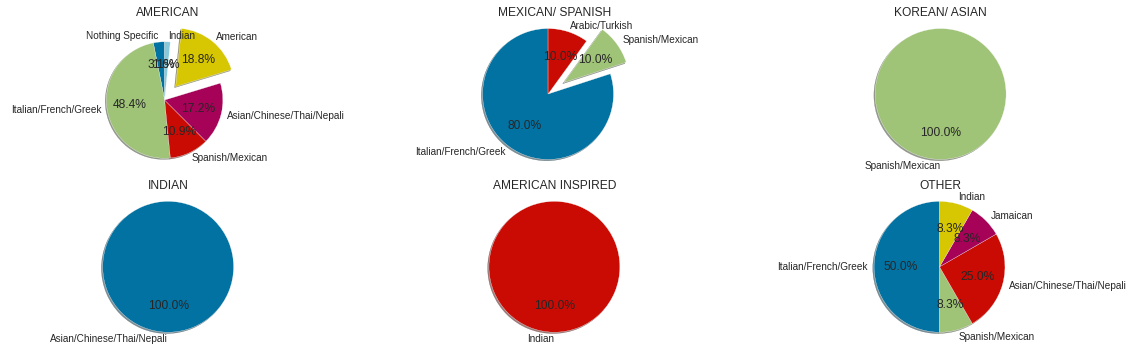

In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

labels = 'Nothing Specific','Italian/French/Greek','Spanish/Mexican','Asian/Chinese/Thai/Nepali','American', 'Indian'
sizes = [count10, count11, count12, count14, count15, count18]
explode = (0, 0, 0, 0, 0.3, 0)

labels1 = 'Italian/French/Greek','Spanish/Mexican','Arabic/Turkish'
sizes1 = [count21, count22, count23]
explode1 = (0, 0.3, 0)

labels2 = ['Spanish/Mexican']
sizes2 = [count32]
explode2 = (0)

labels3 = ['Asian/Chinese/Thai/Nepali']
sizes3 = [count44]
explode3 = (0)

labels4 = ['Indian']
sizes4 = [count58]
explode4 = (0)

labels5 = 'Italian/French/Greek','Spanish/Mexican','Asian/Chinese/Thai/Nepali', 'Jamaican','Indian'
sizes5 = [count61, count62, count64, count67, count68]
explode5 = (0, 0, 0, 0, 0)



# fracs = []
# plt.pie(fracs, 
#         autopct=lambda x: "0.0", 
#         colors="b", 
#         textprops={'fontsize' : '30', 'weight': 'bold'})
# plt.title('Event Logs',fontsize = 30)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left=0.1, right=2, bottom=0.1, top=0.9)
axs[0][0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
      shadow=True, startangle=90)
axs[0][0].axis('equal')
axs[0][0].set_title('AMERICAN')

axs[0][1].pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
      shadow=True, startangle=90)
axs[0][1].axis('equal')
axs[0][1].set_title('MEXICAN/ SPANISH')

axs[0][2].pie(sizes2, labels=labels2, autopct='%1.1f%%', colors='gold',
      shadow=True, startangle=90)
axs[0][2].axis('equal')
axs[0][2].set_title('KOREAN/ ASIAN')

axs[1][0].pie(sizes3, labels=labels3, autopct='%1.1f%%',
      shadow=True, startangle=90)
axs[1][0].axis('equal')
axs[1][0].set_title('INDIAN')

axs[1][1].pie(sizes4, labels=labels4, autopct='%1.1f%%', colors='red',
      shadow=True, startangle=90)
axs[1][1].axis('equal')
axs[1][1].set_title('AMERICAN INSPIRED')

axs[1][2].pie(sizes5, explode=explode5, labels=labels5, autopct='%1.1f%%',
      shadow=True, startangle=90)
axs[1][2].axis('equal')
axs[1][2].set_title('OTHER')

plt.show()


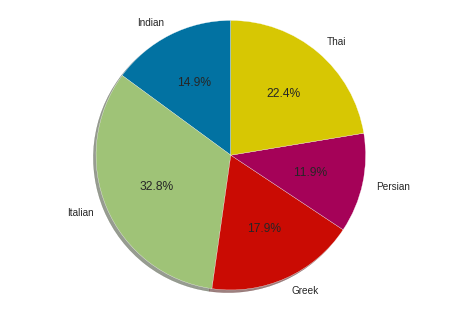

In [ ]:
# CUSINE,LIKELY TO EAT

#for x in range(len(test1)):

# count_A_I = len(test1[(test1['cuisine'] == 1) & ((test1['italian_food'] == 4) | (test1['italian_food'] == 5))])
# count_A_In = len(test1[(test1['cuisine'] == 1) & ((test1['indian_food'] == 4) | (test1['indian_food'] == 5))])
# count_A_G = len(test1[(test1['cuisine'] == 1) & ((test1['greek_food'] == 4) | (test1['greek_food'] == 5))])
# count_A_P = len(test1[(test1['cuisine'] == 1) & ((test1['persian_food'] == 4) | (test1['persian_food'] == 5))])
# count_A_T = len(test1[(test1['cuisine'] == 1) & ((test1['thai_food'] == 4) | (test1['thai_food'] == 5))])

count_I = len(test1[(test1['cuisine'] != 1) & ((test1['italian_food'] == 4) | (test1['italian_food'] == 5))])
count_In = len(test1[(test1['cuisine'] != 1) & ((test1['indian_food'] == 4) | (test1['indian_food'] == 5))])
count_G = len(test1[(test1['cuisine'] != 1) & ((test1['greek_food'] == 4) | (test1['greek_food'] == 5))])
count_P = len(test1[(test1['cuisine'] != 1) & ((test1['persian_food'] == 4) | (test1['persian_food'] == 5))])
count_T = len(test1[(test1['cuisine'] != 1) & ((test1['thai_food'] == 4) | (test1['thai_food'] == 5))])


#sum1 = len(test1[(test1['cuisine'] == 1)])
sum2 = len(test1[(test1['cuisine'] != 1)])
#print(sum1, sum2)

# labels = 'Indian','Italian','Greek','Persian','Thai'
# sizes = [count_A_In, count_A_I, count_A_G, count_A_P, count_A_T]
# explode = (0, 0, 0, 0, 0)

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()


labels = 'Indian','Italian','Greek','Persian','Thai'
sizes = [count_In, count_I, count_G, count_P, count_T]
explode = (0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


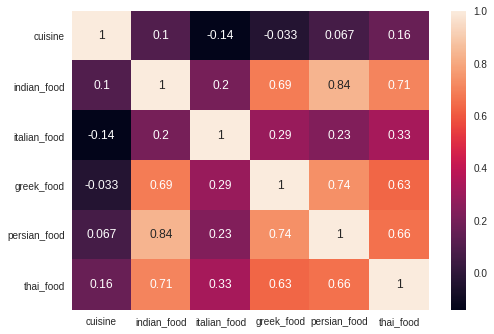

In [ ]:


data = {'cuisine': test1['cuisine'],
        'indian_food': test1['indian_food'],
        'italian_food': test1['italian_food'],
        'greek_food' :test1['greek_food'],
        'persian_food':test1['persian_food'],
        'thai_food':test1['thai_food']
        }

df = pd.DataFrame(first,columns=['cuisine','indian_food','italian_food','greek_food','persian_food','thai_food'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

# RELATION BETWEEN DIET AND GPA

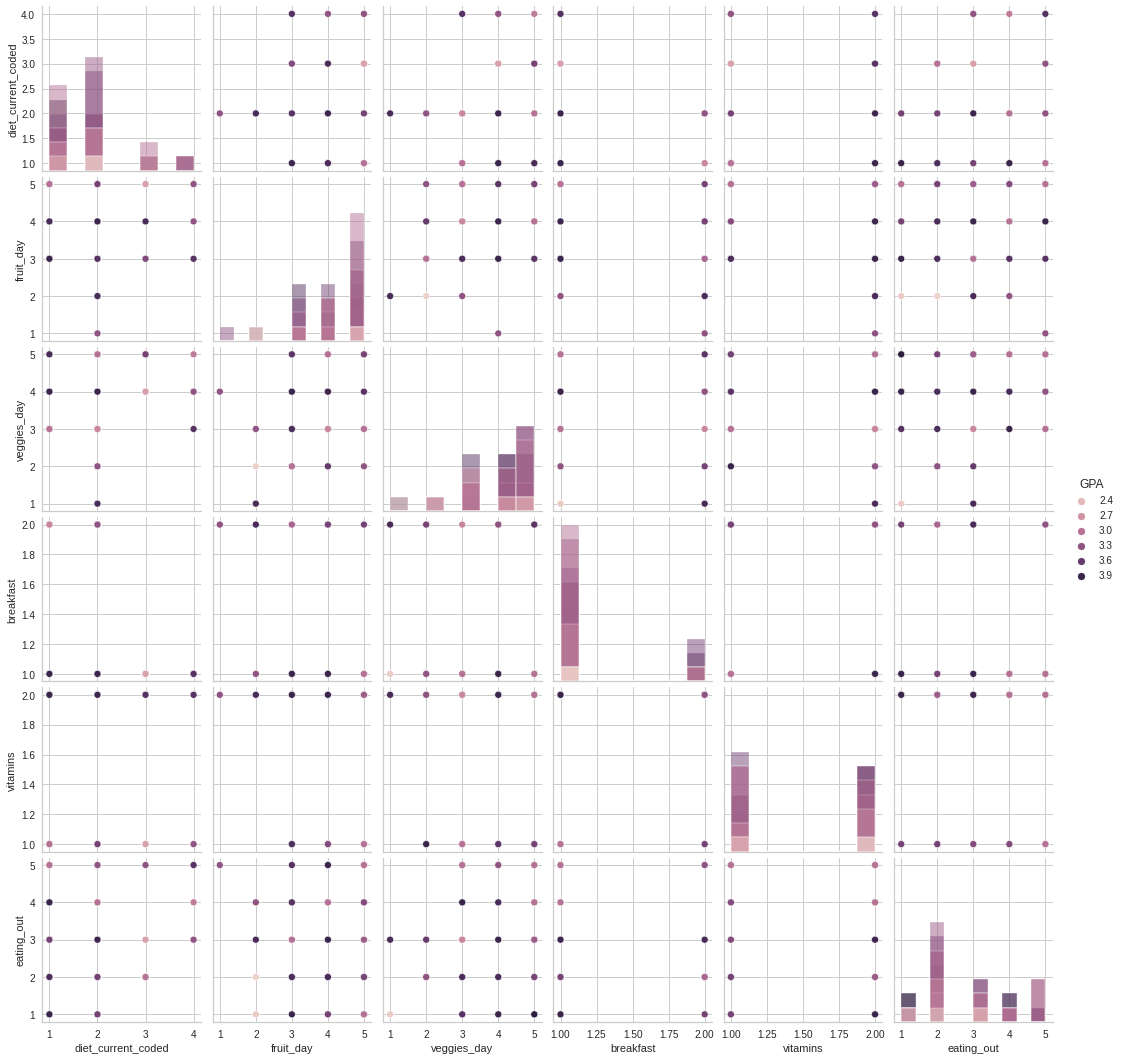

In [ ]:
# QUESTION 2

second = newd[["GPA",'diet_current','diet_current_coded','fruit_day','veggies_day','breakfast',
               'vitamins', 'eating_out']]
second.head(15)
cols = second.columns



x = sn.pairplot(second, hue="GPA", diag_kind="hist")
x

In [ ]:
df = pd.DataFrame(second,columns=cols)

corrMatrix = df.corr()
pd.set_option('display.max_columns', None)
print ('Correlation Matrix\n',corrMatrix)

Correlation Matrix
                          GPA  diet_current_coded  fruit_day  veggies_day  \
GPA                 1.000000           -0.174870   0.055254     0.163325   
diet_current_coded -0.174870            1.000000  -0.146816    -0.144285   
fruit_day           0.055254           -0.146816   1.000000     0.625937   
veggies_day         0.163325           -0.144285   0.625937     1.000000   
breakfast           0.018977            0.035937  -0.309256    -0.232130   
vitamins           -0.006918            0.107810  -0.244149    -0.266519   
eating_out         -0.067796            0.172206  -0.041525    -0.027504   

                    breakfast  vitamins  eating_out  
GPA                  0.018977 -0.006918   -0.067796  
diet_current_coded   0.035937  0.107810    0.172206  
fruit_day           -0.309256 -0.244149   -0.041525  
veggies_day         -0.232130 -0.266519   -0.027504  
breakfast            1.000000  0.090909    0.013498  
vitamins             0.090909  1.000000    0.08

In [ ]:
#HEALTHY 
healthy =  second[(second['vitamins'] == 1) & (second['breakfast'] == 1) &  
                            ((second['veggies_day'] == 4) | (second['veggies_day'] == 5)) &
                             ((second['fruit_day'] == 4) | (second['fruit_day'] == 5))]

print(len(healthy))
healthy.head(10)


39


,GPA,diet_current,diet_current_coded,fruit_day,veggies_day,breakfast,vitamins,eating_out
0,2.400,eat good and exercise,1,5,5,1,1,3
6,3.800,I eat a lot of chicken and broccoli for dinner...,3,4,4,1,1,2
9,3.300,I eat healthy all the time when possible. I tr...,1,5,5,1,1,3
11,3.904,"I am very health concious. I eat many fruits, ...",1,5,5,1,1,1
14,3.100,"Making sure I have enough protein intake, as w...",1,5,5,1,1,2
16,4.000,I eat very healthy,1,5,5,1,1,1
18,3.400,I eat lots of fruit and veggies. I eat lots of...,1,5,5,1,1,3
27,3.000,Very healthy. Good balance of proteins and veg...,1,5,5,1,1,2
29,3.500,anything and everything,2,5,4,1,1,5
31,4.000,Diet consists of 3000-4000 calories a day well...,2,5,5,1,1,2


In [ ]:
# corrMatrix = newd.corr()
# sn.heatmap(corrMatrix, annot=True)
# plt.show()
#UNHEALTHY

unhealthy =  second[  ((second['veggies_day'] != 4) & (second['veggies_day'] != 5)) &
                             ((second['fruit_day'] != 4) & (second['fruit_day'] != 5))]

print(len(unhealthy))
unhealthy.head(10)

16


,GPA,diet_current,diet_current_coded,fruit_day,veggies_day,breakfast,vitamins,eating_out
5,2.250000,My current diet is terrible. I barely have tim...,2,2,1,1,2,1
19,2.200000,Current diet right now isn't very good. I eat ...,2,2,2,1,2,2
20,3.300000,"I eat 2 meals a day, lunch and dinner",2,2,3,1,2,4
26,3.700000,"Most healthy diet, but since I'm an athlete ha...",1,3,3,1,2,2
28,3.200000,Whats necessary for survival.,2,3,2,1,1,2
33,2.800000,I eat a a lot of carbs from pizza and pasta. I...,2,3,3,1,1,2
61,3.432586,My diet is pretty healthy and consists of chic...,1,3,3,1,1,2
65,3.200000,"I don't follow a diet, I eat whatever I want",2,3,3,1,2,3
77,3.100000,Meat carbs and candy,2,3,2,2,2,2
80,3.400000,If there is berries I will eat them. Eat any ...,2,3,2,1,1,3


# RELATION BETWEEN GPA AND EMPLOYMENT

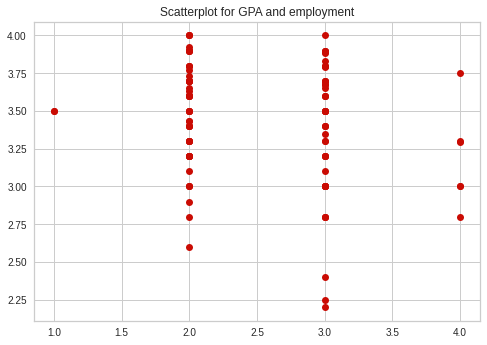

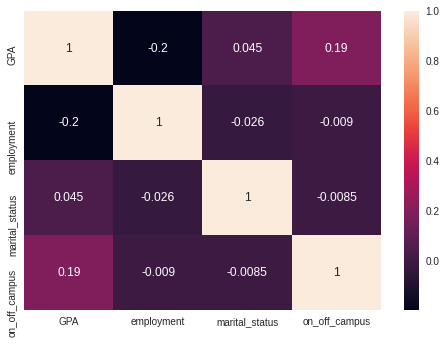

In [ ]:
# FOURTH

test4 = newd[["GPA",'employment','marital_status','on_off_campus']]
plt.plot(test4['employment'],test4['GPA'], 'ro')
plt.title('Scatterplot for GPA and employment')
plt.show()

corrMatrix = test4.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
new4 = test4[test4['GPA'] > 3.2]
print(len(new4))

new4low = test4[test4['GPA'] <= 3.2]
print(len(new4low))

77
33


# ANY MORE VALUABLE INGIGHTS?

In [ ]:
# FIFTH
fifth = newd[['comfort_food','comfort_food_reasons','comfort_food_reasons_coded','healthy_feeling','life_rewarding',
              'self_perception_weight', 'exercise']]

#fifth

# Remove punctuation
fifth['comfort_food_processed'] = fifth['comfort_food'].map(lambda x: re.sub('[,\.!?/]', '', x))
# Convert the titles to lowercase
fifth['comfort_food_processed'] = fifth['comfort_food'].map(lambda x: x.lower())
# Print out the first rows of papers
fifth['comfort_food_processed'].head(10)
#fifth

fifth['comfort_food_reasons_processed'] = fifth['comfort_food_reasons'].map(lambda x: re.sub('[,\.!?/]', '', x))
# Convert the titles to lowercase
fifth['comfort_food_reasons_processed'] = fifth['comfort_food_reasons'].map(lambda x: x.lower())
# Print out the first rows of papers
fifth['comfort_food_reasons_processed'].head(10)
#fifth



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

0                                 we dont have comfort 
1                                  stress, bored, anger
3                                               boredom
4                            stress, boredom, cravings 
5     none, i don't eat comfort food. i just eat whe...
6                                       stress, boredom
7     i eat comfort food when im stressed out from s...
8                                              boredom 
9                            stress, anger and sadness 
10                                             boredom 
Name: comfort_food_reasons_processed, dtype: object

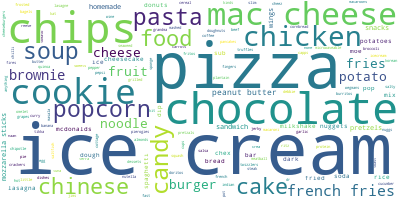

In [ ]:

long_string = ','.join(list(fifth['comfort_food_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()



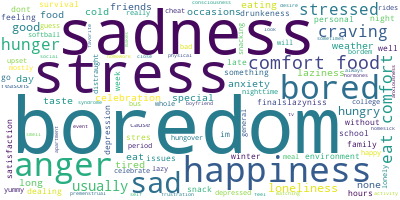

In [ ]:
long_string1 = ','.join(list(fifth['comfort_food_reasons_processed'].values))
wordcloud1 = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud1.generate(long_string1)
wordcloud1.to_image()

In [ ]:
count = len(newd[((newd['healthy_feeling'] == 4) | (newd['healthy_feeling'] == 5))])
count



26

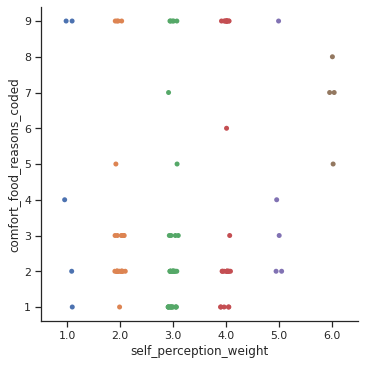

In [ ]:
# plt.plot(fifth['self_perception_weight'], fifth['comfort_food_reasons_coded'], '-p', color='gray',
#          markersize=15, linewidth=4,
#          markerfacecolor='white',
#          markeredgecolor='gray',
#          markeredgewidth=2)
# plt.ylim(1, 9);

sn.set_theme(style="ticks", color_codes=True)
sn.catplot(x=fifth['self_perception_weight'], y=fifth['comfort_food_reasons_coded'], data=fifth)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


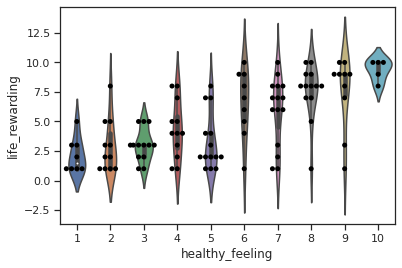

In [ ]:
# fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
# axs.scatter(fifth['healthy_feeling'], fifth['life_rewarding'])
# fig.suptitle('Categorical Plotting')

#sn.swarmplot(x =fifth['healthy_feeling'], y =fifth['life_rewarding'], data = fifth)

sn.violinplot(x =fifth['healthy_feeling'], y =fifth['life_rewarding'], data = fifth) 
sn.swarmplot(x =fifth['healthy_feeling'], y =fifth['life_rewarding'], data = fifth, color ='black')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you

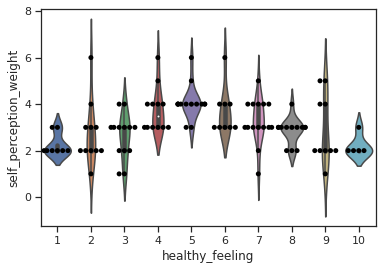

In [ ]:
# sn.violinplot(x =fifth['healthy_feeling'], y =fifth['self_perception_weight'], data = fifth) 
# sn.swarmplot(x =fifth['healthy_feeling'], y =fifth['self_perception_weight'], data = fifth, color ='black')

In [ ]:
# # RANDOM FOREST

# import xlrd
 
# #import numpy as np
# #import seaborn
# #import numpy as np
# #import matplotlib.pyplot as matplotlib
 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
 
# from matplotlib.lines import Line2D
# from scipy.stats import pearsonr
 
# # set seed to make results reproducible
# RF_SEED = 30

In [ ]:
# cols = newd.columns
# cols

In [ ]:
# %matplotlib inline
# import seaborn as sn
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# import plotly.offline as pyo
# import plotly.graph_objs as go

# BUILDING MODEL 

In [ ]:
# MODEL BUILD DATA W/O NLP COLUMNS
data = newd.copy()
data.head(10)

labels= ['comfort_food', 'comfort_food_reasons','diet_current','eating_changes',
         'father_profession', 'fav_cuisine','food_childhood', 'healthy_meal',
       'ideal_diet','meals_dinner_friend', 'mother_profession','type_sports' ]
data = data.drop(labels,axis=1)
#data.info()





In [ ]:
X = data.loc[:, data.columns != 'GPA']
y = data.loc[:, data.columns == 'GPA']
X = X.astype(dtype = 'float64',copy = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


print(X_train.columns)
print(X_test.columns)
print(y_train.columns)
print(y_test.columns)

Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'],
      dtype='object')
Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
    

In [ ]:


# LABEL ENCODING READY ----------------------------------

from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

categorical_cols = ['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories']

cat_data = X[categorical_cols]

# Label encode categories
le=LabelEncoder()

# create a dataframe to store label encoded values
X_le = cat_data.copy()


for i in cat_data.columns:
    le.fit(cat_data[i])
    X_le[i] = le.transform(cat_data[i]).copy()

print(cat_data.shape)

#X_le.head(50)

(110, 46)


In [ ]:
#ANOVA --------------------------------------------------------------------------

def one_way_anova(categorical_data, target_data):
    # create an empty dataframe to store f-statistic and p-value
    stats_df = pd.DataFrame(np.zeros((len(categorical_data.columns), 2)), index = categorical_data.columns, columns = ['f-statistic', 'p-value'])
    
    # merge independent dataframe with target 
    merged_df = categorical_data.merge(pd.DataFrame(target_data, columns = ['GPA']), left_index=True, right_index=True)
    for i in categorical_data.columns:
        unique_values = categorical_data[i].unique()
        tuple_list = []
        for value in unique_values:
            store_values = merged_df['GPA'].loc[merged_df[i]==value].values
            tuple_list.append(store_values)
         
        # get stats from f_oneway test
        statistic, pvalue = f_oneway(*tuple_list)
        stats_df.loc[i, 'f-statistic'] = statistic
        stats_df.loc[i, 'p-value'] = pvalue
        
    return stats_df

In [ ]:
f_test_df = one_way_anova(X_le, y)
f_test_df
f_top10_features = f_test_df[f_test_df['p-value'] < 0.5].sort_values(by = 'f-statistic', ascending = False).head(10)
f_top10_features

,f-statistic,p-value
sports,5.118383,0.007536
nutritional_check,3.447525,0.010899
father_education,3.415726,0.011449
grade_level,3.152243,0.027982
fav_cuisine_coded,3.103049,0.003578
ethnic_food,3.006693,0.021544
calories_scone,2.838729,0.062914
fruit_day,2.508996,0.046272
mother_education,2.422721,0.052778
thai_food,2.098162,0.086231


Text(0.5, 1.0, 'Top 10 Categorical Features -  Correlation w/ Target and log(Target)')

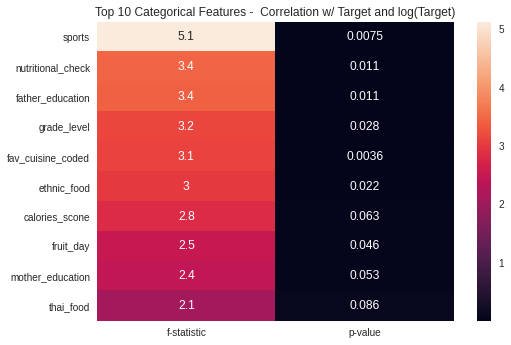

In [ ]:
sn.heatmap(data = f_top10_features, annot=True )
plt.title('Top 10 Categorical Features -  Correlation w/ Target and log(Target)')

In [ ]:
#MUTUAL INFORMATION ........................................................

mi = mutual_info_regression(X_le, y, discrete_features = True, 
                             n_neighbors=3, copy=True, random_state=None)
mi_df = pd.DataFrame(mi, index = categorical_cols, columns = ['mutual_information'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Top 10 Categorical Features - Mutual Information Regression - Discrete Features')

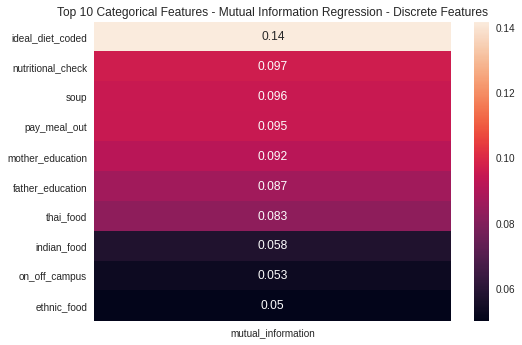

In [ ]:
mi_top10_features = mi_df.sort_values(by = 'mutual_information', ascending=False).head(10)
sn.heatmap(data = mi_top10_features, annot=True )
plt.title('Top 10 Categorical Features - Mutual Information Regression - Discrete Features')

In [ ]:
# RANDOM FOREST

# rf_cat = RandomForestRegressor(n_estimators=1000, criterion='mse', max_features='sqrt')
# rf_cat.fit(X_le, y)



In [ ]:
# feature_importance_random = pd.DataFrame(rf_cat.feature_importances_, categorical_cols, columns=['Importance_Value'])
# rf_cat_top10_features = feature_importance_random.sort_values(by = ['Importance_Value'], ascending=False).head(10)

In [ ]:
# sn.heatmap(data = rf_cat_top10_features, annot=True )
# plt.title('Top 10 Categorical Features - Random Forest - Feature Importance Value')

In [ ]:
# LABEL ENCODING DONE, MODEL BUILD READY ----------------------------------

# import xlrd
 
# import numpy as np
# import seaborn
# import numpy as np
# import matplotlib.pyplot as matplotlib
 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
 
# from matplotlib.lines import Line2D
# from scipy.stats import pearsonr
# from sklearn import metrics



# # MODEL FOR SELECTED FEATURES ----------------------------------------

# newX = X_le.copy()

# cols_model = ['comfort_food_reasons_coded', 'income', 'tortilla_calories', 'eating_changes_coded',
#               'calories_scone','greek_food','Gender','parents_cook','father_education',
#               'self_perception_weight','cuisine']
              

# newX = X_le[cols_model]
# #newX.insert(4, "weight", data['weight'], True)
# print(newX.shape)

# X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)

# baseline = y_train.mean()
# print('Baseline mean',baseline)
# val = baseline.values
# #print('val',val)
# #type(val)

# name = ['Baseline']
# base['Baseline'] = pd.DataFrame(index=np.arange(len(y_train)),columns = name)
# base['Baseline'] = base['Baseline'].fillna(value=val[0])
# base

# print('MSE with Baseline', metrics.mean_squared_error(y_train, base))



# # print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# # print('MSE with Baseline',baseline)






In [ ]:
# # RANDOM FOREST MODEL ------------------------------------------

# rf = RandomForestRegressor(n_estimators=1000, criterion='mse', max_features='sqrt')
# rf.fit(X_train, y_train)

# predictions = rf.predict(X_test)
# predictions

# #pred = pd.DataFrame(data=predictions) 
# #correlation = pearsonr(predictions, y_test))

# y_testing = y_test.to_numpy()
# print(y_testing.shape)


# #print(predictions,'\n',y_testing)



# output_filename = "rf_regression.png"
# title_name = "Random Forest Regression - Real vs Predicted - correlation ({})"
# x_axis_label = "Real"
# y_axis_label = "Predicted"
 

# plt.scatter(predictions, y_test, alpha=0.5)
# plt.show()

In [ ]:
# from yellowbrick.datasets import load_concrete
# from yellowbrick.regressor import PredictionError

# # visualizer = PredictionError(rf)

# # visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# # visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# # visualizer.show()     

# from sklearn import metrics
# #print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))




In [ ]:
# MODEL BUILDING ---------------------------------------------------------------

# %matplotlib inline
# import matplotlib.pyplot as plt
# data.hist(bins=50, figsize=(20,15))
# plt.savefig("attribute_histogram_plots")
# plt.show()




# calories_scone                0.248135
# income                        0.226546
# eating_changes_coded          0.200703
# greek_food                    0.129435
# Gender                        0.121545
# tortilla_calories             0.108244
# parents_cook                 -0.107482
# father_education             -0.126246
# self_perception_weight       -0.133394
# cuisine                      -0.198774
# comfort_food_reasons_coded   -0.659886

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# FINAL RANDOM FOREST REGRESSOR

In [ ]:
# FINAL MODEL BUILDING PHASE
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

def choose_data():
  X = data.loc[:, data.columns != 'GPA']
  y = data.loc[:, data.columns == 'GPA']
  X = X.astype(dtype = 'float64',copy = True)




  categorical_cols = ['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories']

  cat_data = X[categorical_cols]

  # Label encode categories
  le=LabelEncoder()

  # create a dataframe to store label encoded values
  X_le = cat_data.copy()


  for i in cat_data.columns:
    le.fit(cat_data[i])
    X_le[i] = le.transform(cat_data[i]).copy()

  #print('Before',X_le)
  X_le['weight'] = data['weight']

  print(X_le)
  #print(cat_data.shape)
  return X_le, y

RANDOM FOREST

In [ ]:
import xlrd
 
import numpy as np
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
 
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from sklearn import metrics



def baseline_mse(X_le, y):
# MODEL FOR SELECTED FEATURES ----------------------------------------

 
  newX = X_le.copy()

  # cols_model = ['comfort_food_reasons_coded', 'income', 'tortilla_calories', 'eating_changes_coded',
  #               'calories_scone','greek_food','Gender','parents_cook','father_education',
  #               'self_perception_weight','cuisine']
                

  #newX = X_le[cols_model]
  newX = X_le
  print(newX.shape)

  X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.30, random_state=42)

  baseline = y_train.mean()
  #print('Baseline mean',baseline)
  val = baseline.values
  #print('val',val)
  #type(val)

  name = ['Baseline']
  base = pd.DataFrame(index=np.arange(len(y_train)),columns = name)
  base['Baseline'] = base['Baseline'].fillna(value=val[0])
  base

  print('MSE with Baseline', metrics.mean_squared_error(y_train, base))

  B_MSE = metrics.mean_squared_error(y_train, base)
  M_MSE, mscore, model = RandomForest(X_train, X_test, y_train, y_test)
  return B_MSE, M_MSE, mscore, model


In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


def RandomForest(X_train, X_test, y_train, y_test):
  # RANDOM FOREST MODEL ------------------------------------------

  rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='sqrt')
  rf.fit(X_train, y_train)

  predictions = rf.predict(X_test)
  predictions

  #pred = pd.DataFrame(data=predictions) 
  #correlation = pearsonr(predictions, y_test))

  # y_testing = y_test.to_numpy()
  # print(y_testing.shape)


  #print(predictions,'\n',y_testing)



  output_filename = "rf_regression.png"
  title_name = "Random Forest Regression - Real vs Predicted "
  x_axis_label = "Real"
  y_axis_label = "Predicted"
  

  # plt.scatter(predictions, y_test, alpha=0.5)
  # plt.show()

  print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
  #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
  MSE = metrics.mean_squared_error(y_test, predictions)
  modelscore = rf.score(X_test, y_test)
  print('Model Score', modelscore)
  return MSE, modelscore, rf

In [ ]:
# CORRELATION FOR ATTRIBUTES
# corr_matrix = data.corr()

# data.plot(kind="scatter", y="GPA", x="weight", alpha=0.5)
# plt.savefig('scatter.png')

# corr_matrix["GPA"].sort_values(ascending=False)


# MAIN FOR THE MODEL RUNNING
basel = []
model = []
score = []
X_le, y = choose_data()


for i in range(100):
  baseline_val, model_val, score_val, mod = baseline_mse(X_le, y)
  basel.append(baseline_val)
  model.append(model_val)
  score.append(score_val)
  i += 1






In [ ]:
feature_labels = np.array(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'])
importance = mod.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} => {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

breakfast => 0.07%
fries => 0.38%
marital_status => 0.57%
coffee => 0.65%
soup => 0.69%
drink => 0.69%
Gender => 0.99%
vitamins => 1.13%
fav_food => 1.14%
italian_food => 1.20%
on_off_campus => 1.26%
cuisine => 1.52%
calories_scone => 1.55%
employment => 1.59%
calories_day => 1.62%
exercise => 1.62%
income => 1.68%
tortilla_calories => 1.70%
eating_changes_coded => 1.71%
comfort_food_reasons_coded => 1.73%
pay_meal_out => 1.73%
turkey_calories => 1.77%
waffle_calories => 1.78%
ideal_diet_coded => 1.79%
persian_food => 1.98%
fav_cuisine_coded => 2.05%
veggies_day => 2.17%
thai_food => 2.25%
parents_cook => 2.27%
cook => 2.30%
eating_out => 2.57%
diet_current_coded => 2.58%
fruit_day => 2.69%
self_perception_weight => 2.76%
indian_food => 2.82%
life_rewarding => 2.83%
ethnic_food => 2.90%
calories_chicken => 2.97%
mother_education => 3.08%
greek_food => 3.17%
nutritional_check => 3.36%
eating_changes_coded1 => 3.43%
healthy_feeling => 3.73%
weight => 3.91%
sports => 4.18%
grade_level => 

In [ ]:
# RESULT FOR RANDOM FOREST
print('Baseline :',(sum(basel) / len(basel)))
print('Model :', (sum(model) / len(model)))
print('Model Score :', (sum(score) / len(score)))

Baseline : 0.13311999660668186
Model : 0.15381402104321482
Model Score : 0.11178380582616407


GRADIENT BOOSTING

In [ ]:
import numpy as np
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
 
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
from sklearn import metrics



def baseline_mse(X_le, y):
# MODEL FOR SELECTED FEATURES ----------------------------------------

 
  newX = X_le.copy()

  # cols_model = ['comfort_food_reasons_coded', 'income', 'tortilla_calories', 'eating_changes_coded',
  #               'calories_scone','greek_food','Gender','parents_cook','father_education',
  #               'self_perception_weight','cuisine']
                
  cols_model = ['comfort_food_reasons_coded', 'tortilla_calories', 'healthy_feeling', 'drink',
                 'calories_scone','italian_food','ideal_diet_coded','life_rewarding']


  newX = X_le[cols_model]
  #newX = X_le
  print(newX.shape)

  X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)

  baseline = y_train.mean()
  print('Baseline mean',baseline)
  val = baseline.values
  #print('val',val)
  #type(val)

  name = ['Baseline']
  base = pd.DataFrame(index=np.arange(len(y_train)),columns = name)
  base['Baseline'] = base['Baseline'].fillna(value=val[0])
  base

  print('MSE with Baseline', metrics.mean_squared_error(y_train, base))

  B_MSE = metrics.mean_squared_error(y_train, base)
  M_MSE, mscore, model = Grad_Boost(X_train, X_test, y_train, y_test)
  return B_MSE, M_MSE, mscore, model


In [ ]:
# MODEL USING GRADIENT BOOSTING
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

def Grad_Boost(X_train, X_test, y_train, y_test):
  # RANDOM FOREST MODEL ------------------------------------------

  # rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='sqrt')
  # rf.fit(X_train, y_train)

  model = ensemble.GradientBoostingRegressor()
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)
  predictions

  #pred = pd.DataFrame(data=predictions) 
  #correlation = pearsonr(predictions, y_test))

  # y_testing = y_test.to_numpy()
  # print(y_testing.shape)


  #print(predictions,'\n',y_testing)



  output_filename = "gb_regression.png"
  title_name = "Gradient Boosting - Real vs Predicted "
  x_axis_label = "Real"
  y_axis_label = "Predicted"
  

  # plt.scatter(predictions, y_test, alpha=0.5)
  # plt.show()

  print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
  MSE = metrics.mean_squared_error(y_test, predictions)
  modelscore = model.score(X_test, y_test)
  print(modelscore)
  return MSE, modelscore, model

In [ ]:
basel = []
model = []
score = []
X_le, y = choose_data()


for i in range(30):
  baseline_val, model_val, score_val, mod = baseline_mse(X_le, y)
  basel.append(baseline_val)
  model.append(model_val)
  score.append(score_val)
  i += 1



In [ ]:
feature_labels = np.array(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'weight'])
importance = mod.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} => {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

calories_day => 2.18%
coffee => 7.14%
comfort_food_reasons_coded => 7.88%
breakfast => 8.30%
calories_scone => 8.47%
Gender => 12.81%
cook => 21.50%
calories_chicken => 31.72%


In [ ]:
# RESULT FOR GRADIENT BOOST
print('Baseline :',(sum(basel) / len(basel)))
print('Model :', (sum(model) / len(model)))
print('Model Score :', (sum(score) / len(score)))

Baseline : 0.13343304259711006
Model : 0.19287871777010585
Model Score : -0.14483378795939209


# QUESTION 5 _ MORE VALUABLE INSIGHTS CONTINUED

Text(0.5, 1.0, 'Importance of consuming calories per day')

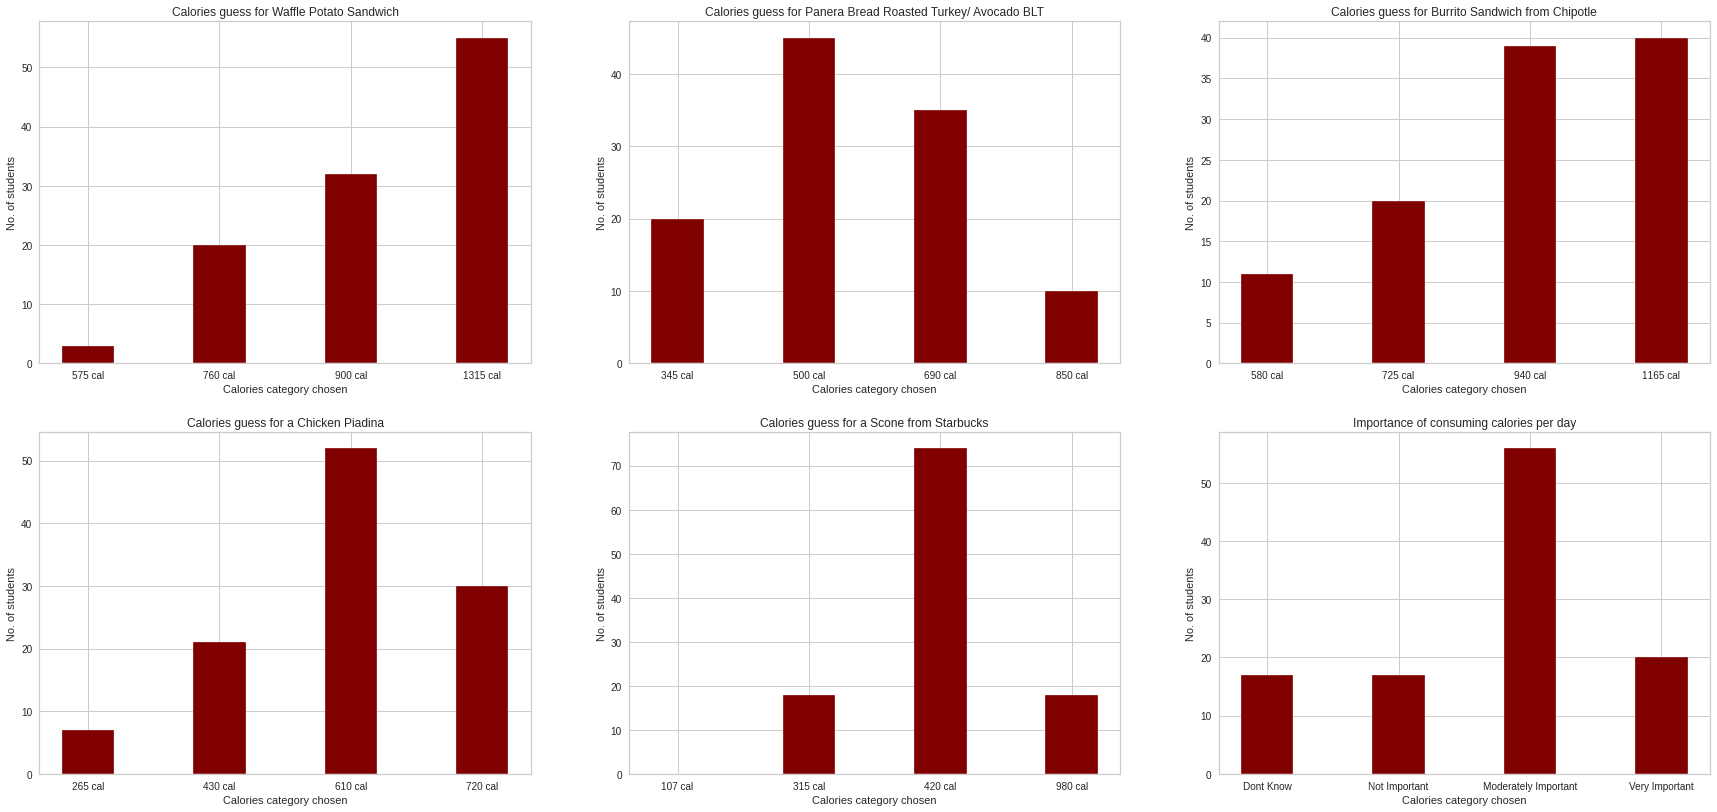

In [ ]:
# CALORIES 

cols = newd.columns
cols


test5 = newd[['calories_chicken', 'calories_day','calories_scone', 
       'nutritional_check','tortilla_calories', 'turkey_calories', 'waffle_calories', 'healthy_feeling',
       'eating_out']]

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left=0.1, right=3, bottom=0.1, top=2)

c1 = len(test5[(test5['waffle_calories'] == 575)])
c2 = len(test5[(test5['waffle_calories'] == 760)])
c3 = len(test5[(test5['waffle_calories'] == 900)])
c4 = len(test5[(test5['waffle_calories'] == 1315)])
height = [c1, c2, c3, c4]
bars = ('575 cal', '760 cal', '900 cal', '1315 cal')
axs[0,0].bar(bars, height, color ='maroon',  width = 0.4) 
axs[0,0].set_xlabel("Calories category chosen") 
axs[0,0].set_ylabel("No. of students") 
axs[0,0].set_title("Calories guess for Waffle Potato Sandwich") 
#286

c1 = len(test5[(test5['turkey_calories'] == 345)])
c2 = len(test5[(test5['turkey_calories'] == 500)])
c3 = len(test5[(test5['turkey_calories'] == 690)])
c4 = len(test5[(test5['turkey_calories'] == 850)])
height = [c1, c2, c3, c4]
bars = ('345 cal', '500 cal', '690 cal', '850 cal')
axs[0,1].bar(bars, height, color ='maroon',  width = 0.4) 
axs[0,1].set_xlabel("Calories category chosen") 
axs[0,1].set_ylabel("No. of students") 
axs[0,1].set_title("Calories guess for Panera Bread Roasted Turkey/ Avocado BLT") 
#710

c1 = len(test5[(test5['tortilla_calories'] == 580)])
c2 = len(test5[(test5['tortilla_calories'] == 725)])
c3 = len(test5[(test5['tortilla_calories'] == 940)])
c4 = len(test5[(test5['tortilla_calories'] == 1165)])
height = [c1, c2, c3, c4]
bars = ('580 cal', '725 cal', '940 cal', '1165 cal') 
axs[0,2].bar(bars, height, color ='maroon',  width = 0.4)
axs[0,2].set_xlabel("Calories category chosen") 
axs[0,2].set_ylabel("No. of students") 
axs[0,2].set_title("Calories guess for Burrito Sandwich from Chipotle") 
#1000

c1 = len(test5[(test5['calories_chicken'] == 265)])
c2 = len(test5[(test5['calories_chicken'] == 430)])
c3 = len(test5[(test5['calories_chicken'] == 610)])
c4 = len(test5[(test5['calories_chicken'] == 720)])
height = [c1, c2, c3, c4]
bars = ('265 cal', '430 cal', '610 cal', '720 cal')
axs[1,0].bar(bars, height, color ='maroon',  width = 0.4)
axs[1,0].set_xlabel("Calories category chosen") 
axs[1,0].set_ylabel("No. of students") 
axs[1,0].set_title("Calories guess for a Chicken Piadina") 
#346

c1 = len(test5[(test5['calories_scone'] == 107)])
c2 = len(test5[(test5['calories_scone'] == 315)])
c3 = len(test5[(test5['calories_scone'] == 420)])
c4 = len(test5[(test5['calories_scone'] == 980)])
height = [c1, c2, c3, c4]
bars = ('107 cal', '315 cal', '420 cal', '980 cal')
axs[1,1].bar(bars, height, color ='maroon',  width = 0.4)
axs[1,1].set_xlabel("Calories category chosen") 
axs[1,1].set_ylabel("No. of students") 
axs[1,1].set_title("Calories guess for a Scone from Starbucks") 
#380

c1 = len(test5[(test5['calories_day'] == 1)])
c2 = len(test5[(test5['calories_day'] == 2)])
c3 = len(test5[(test5['calories_day'] == 3)])
c4 = len(test5[(test5['calories_day'] == 4)])
height = [c1, c2, c3, c4]
bars = ('Dont Know', 'Not Important', 
        'Moderately Important', 'Very Important')
axs[1,2].bar(bars, height, color ='maroon',  width = 0.4)
axs[1,2].set_xlabel("Calories category chosen") 
axs[1,2].set_ylabel("No. of students") 
axs[1,2].set_title("Importance of consuming calories per day")





# axs[0,0].set_title('Chicken')

# axs[0,1].pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
#       shadow=True, startangle=90)
# axs[0,1].set_title('Scone')

# axs[0,2].pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
#       shadow=True, startangle=90)
# axs[0,2].set_title('Tortilla')

# axs[2,0].pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
#       shadow=True, startangle=90)
# axs[2,0].set_title('Turkey')

# axs[2,1].pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
#       shadow=True, startangle=90)
# axs[2,1].set_title('Waffle')


In [ ]:
# EatOuts = test5['eating_out']
# CaloriesDay = test5['calories_day']
  
# plt.plot(EatOuts, CaloriesDay)
# plt.title('Eat Out Vs CaloriesDay')
# plt.xlabel('EatOuts')
# plt.ylabel('CaloriesDay')
# plt.show()


# c1 = len(test5[(test5['calories_day'] == 1)])
# c2 = len(test5[(test5['calories_day'] == 2)])
# c3 = len(test5[(test5['calories_day'] == 3)])
# c4 = len(test5[(test5['calories_day'] == 4)])
# height = [c1, c2, c3, c4]
# bars = ('Dont Know', 'Not Important', 
#         'Moderately Important', 'Very Important')
# axs[1,2].bar(bars, height, color ='maroon',  width = 0.4)
# axs[1,2].set_xlabel("Calories category chosen") 
# axs[1,2].set_ylabel("No. of students") 
# axs[1,2].set_title("Importance of consuming calories per day")

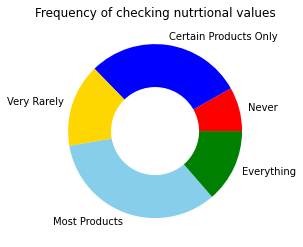

In [ ]:
names='Never', 'Certain Products Only', 'Very Rarely', 'Most Products', 'Everything',
c1 = len(test5[(test5['nutritional_check'] == 1)])
c2 = len(test5[(test5['nutritional_check'] == 2)])
c3 = len(test5[(test5['nutritional_check'] == 3)])
c4 = len(test5[(test5['nutritional_check'] == 4)])
c5 = len(test5[(test5['nutritional_check'] == 5)])
size = [c1, c2, c3, c4, c5]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['red','blue','gold','skyblue','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Frequency of checking nutrtional values')
plt.show()
 


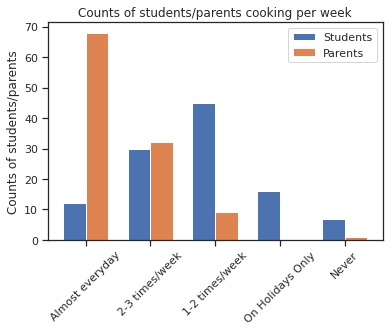

In [ ]:
test_cook = newd[['cook', 'parents_cook','calories_scone', 'eating_changes_coded',
              'eating_out','income', 'self_perception_weight', 'Gender']]


N = 5

c1 = len(test_cook[(test_cook['cook'] == 1)])
c2 = len(test_cook[(test_cook['cook'] == 2)])
c3 = len(test_cook[(test_cook['cook'] == 3)])
c4 = len(test_cook[(test_cook['cook'] == 4)])
c5 = len(test_cook[(test_cook['cook'] == 5)])
students = [c1, c2, c3, c4, c5]

c1 = len(test_cook[(test_cook['parents_cook'] == 1)])
c2 = len(test_cook[(test_cook['parents_cook'] == 2)])
c3 = len(test_cook[(test_cook['parents_cook'] == 3)])
c4 = len(test_cook[(test_cook['parents_cook'] == 4)])
c5 = len(test_cook[(test_cook['parents_cook'] == 5)])
parents = [c1, c2, c3, c4, c5]


ind = np.arange(N) 
width = 0.35       
plt.bar(ind, students, width, label='Students')
plt.bar(ind + width, parents, width,
    label='Parents')

plt.ylabel('Counts of students/parents')
plt.title('Counts of students/parents cooking per week')


plt.xticks(ind + width / 2, ('Almost everyday', '2-3 times/week', 
                             '1-2 times/week', 'On Holidays Only', 'Never'), rotation = 45)
#plt.xticklabels(labels, rotation = 45, ha="left")
plt.legend(loc='best')
plt.show()

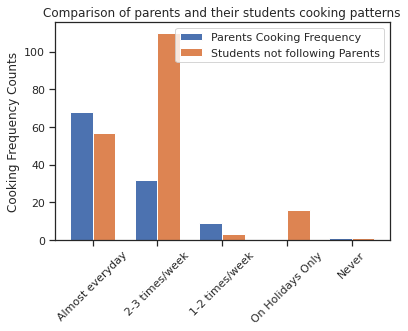

In [ ]:
# count = len(test_cook[((test_cook['cook'] == 1) & (test_cook['parents_cook'] == 1)) |
#                       ((test_cook['cook'] == 2) & (test_cook['parents_cook'] == 2)) |
#                       ((test_cook['cook'] == 3) & (test_cook['parents_cook'] == 3)) |
#                       ((test_cook['cook'] == 4) & (test_cook['parents_cook'] == 4)) |
#                       ((test_cook['cook'] == 5) & (test_cook['parents_cook'] == 5)) ])
# count


N = 5

c1 = len(test_cook[(test_cook['parents_cook'] == 1)])
c2 = len(test_cook[(test_cook['parents_cook'] == 2)])
c3 = len(test_cook[(test_cook['parents_cook'] == 3)])
c4 = len(test_cook[(test_cook['parents_cook'] == 4)])
c5 = len(test_cook[(test_cook['parents_cook'] == 5)])
ps = [c1, c2, c3, c4, c5]

c1 = len(test_cook[(test_cook['cook'] != 1) & (test_cook['parents_cook'] == 1)])
c2 = len(test_cook[(test_cook['cook'] != 2 & (test_cook['parents_cook'] == 2))])
c3 = len(test_cook[(test_cook['cook'] != 3) & (test_cook['parents_cook'] == 3)])
c4 = len(test_cook[(test_cook['cook'] == 4) & (test_cook['parents_cook'] != 4)])
c5 = len(test_cook[(test_cook['cook'] != 5) & (test_cook['parents_cook'] == 5)])
ps_generation = [c1, c2, c3, c4, c5]


ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ps, width, label='Parents Cooking Frequency')
plt.bar(ind + width, ps_generation, width,
    label='Students not following Parents')

plt.ylabel('Cooking Frequency Counts')
plt.title('Comparison of parents and their students cooking patterns')


plt.xticks(ind + width / 2, ('Almost everyday', '2-3 times/week', 
                             '1-2 times/week', 'On Holidays Only', 'Never'), rotation = 45)
#plt.xticklabels(labels, rotation = 45, ha="left")
plt.legend(loc='best')
plt.show()

In [ ]:
f = len(test_cook[(test_cook['Gender'] == 1)])
m = len(test_cook[(test_cook['Gender'] == 2)])

print('Females', f)
print('Males', m)

Females 69
Males 41


In [ ]:
N = 5

c1 = len(test_cook[(test_cook['cook'] == 1) & (test_cook['Gender'] == 1)])
c2 = len(test_cook[(test_cook['cook'] == 2 & (test_cook['Gender'] == 1))])
c3 = len(test_cook[(test_cook['cook'] == 3) & (test_cook['Gender'] == 1)])
c4 = len(test_cook[(test_cook['cook'] == 4) & (test_cook['Gender'] == 1)])
c5 = len(test_cook[(test_cook['cook'] == 5) & (test_cook['Gender'] == 1)])
ps = [c1, c2, c3, c4, c5]

c1 = len(test_cook[(test_cook['cook'] == 1) & (test_cook['Gender'] == 2)])
c2 = len(test_cook[(test_cook['cook'] == 2 & (test_cook['Gender'] == 2))])
c3 = len(test_cook[(test_cook['cook'] == 3) & (test_cook['Gender'] == 2)])
c4 = len(test_cook[(test_cook['cook'] == 4) & (test_cook['Gender'] == 2)])
c5 = len(test_cook[(test_cook['cook'] == 5) & (test_cook['Gender'] == 2)])
ps_generation = [c1, c2, c3, c4, c5]


ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ps, width, label='Females')
plt.bar(ind + width, ps_generation, width,
    label='Males')

plt.ylabel('Cooking Frequency Counts')
plt.title('Comparision of Males and Females cooking patterns')


plt.xticks(ind + width / 2, ('Almost everyday', '2-3 times/week', 
                             '1-2 times/week', 'On Holidays Only', 'Never'), rotation = 45)
#plt.xticklabels(labels, rotation = 45, ha="left")
plt.legend(loc='best')
plt.show()



# PREDICT WEIGHT

In [ ]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

#def choose_data():
X = data.loc[:, data.columns != 'weight']
y = data.loc[:, data.columns == 'weight']
X = X.astype(dtype = 'float64',copy = True)




categorical_cols = ['Gender', 'breakfast', 'calories_chicken', 'calories_day',
      'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
      'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
      'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
      'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
      'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
      'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
      'life_rewarding', 'marital_status', 'mother_education',
      'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
      'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
      'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
      'waffle_calories']

cat_data = X[categorical_cols]

# Label encode categories
le=LabelEncoder()

# create a dataframe to store label encoded values
X_le = cat_data.copy()


for i in cat_data.columns:
  le.fit(cat_data[i])
  X_le[i] = le.transform(cat_data[i]).copy()

#print('Before',X_le)
X_le['GPA'] = data['GPA']

print(X_le)
#print(cat_data.shape)
#return X_le, y

In [ ]:
print(X_le.columns)

Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'mother_education',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories', 'GPA'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Top 10 Categorical Features - Random Forest - Feature Importance Value')

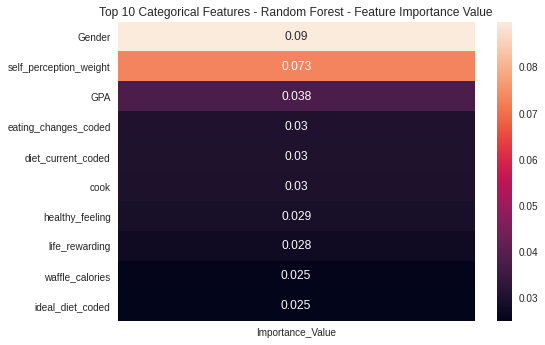

In [ ]:
# RANDOM FOREST

rf_cat = RandomForestRegressor(n_estimators=1000, criterion='mse', max_features='sqrt')
rf_cat.fit(X_le, y)

feature_importance_random = pd.DataFrame(rf_cat.feature_importances_, X_le.columns, columns=['Importance_Value'])
rf_cat_top10_features = feature_importance_random.sort_values(by = ['Importance_Value'], ascending=False).head(10)

sn.heatmap(data = rf_cat_top10_features, annot=True )
plt.title('Top 10 Categorical Features - Random Forest - Feature Importance Value')